In [39]:
import sys, importlib
from kNN_analytic import *
importlib.reload(sys.modules['kNN_analytic'])
import numpy as np
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = (12, 8)
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

(1e-06, 1.1)

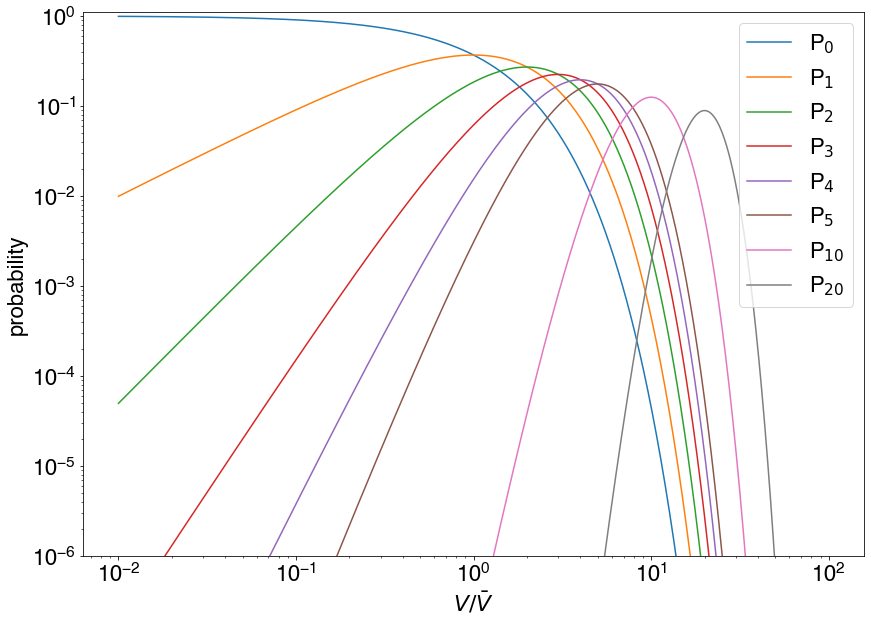

In [40]:
fig = plt.figure(figsize=((14,10)))
N = 1000
E = np.exp(1)
nV = np.logspace(-2,2,N)
sig = 2e-5*nV**(-0.5) # 
plt.loglog(nV, PG0(nV,sig), label=r"P$_0$")
plt.loglog(nV, PG1(nV,sig), label=r"P$_1$")
plt.loglog(nV, PG2(nV,sig), label=r"P$_2$")
plt.loglog(nV, PG3(nV,sig), label=r"P$_3$")
plt.loglog(nV, PG4(nV,sig), label=r"P$_4$")
plt.loglog(nV, PG5(nV,sig), label=r"P$_5$")
plt.loglog(nV, PG10(nV,sig), label=r"P$_{10}$")
plt.loglog(nV, PG20(nV,sig), label=r"P$_{20}$")
plt.legend();
plt.xlabel(r"$V/\bar{V}$")
plt.ylabel("probability")
plt.ylim(1e-6,1.1)

(1e-06, 1.1)

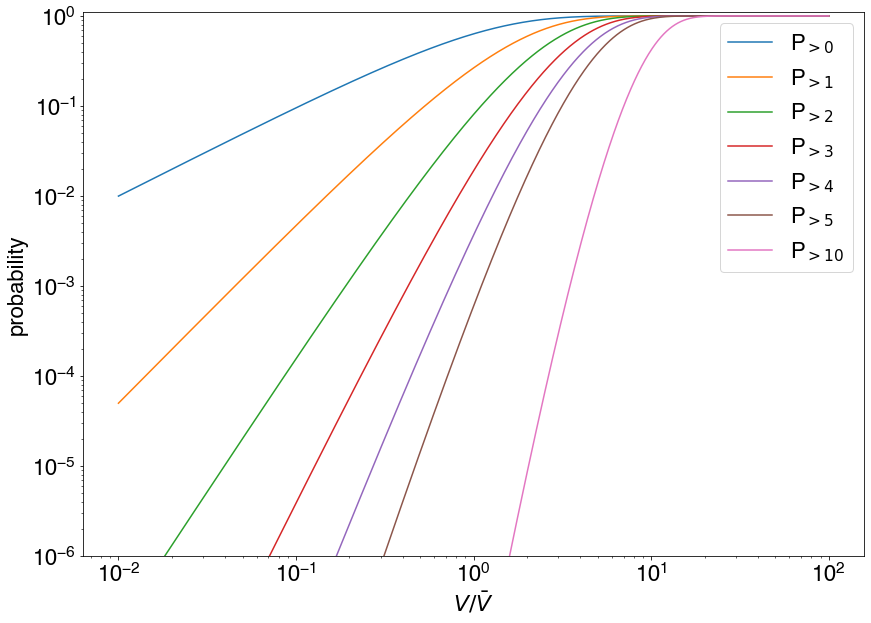

In [41]:
fig = plt.figure(figsize=((14,10)))
N = 1000
E = np.exp(1)
nV = np.logspace(-2,2,N)
sig = 2e-5*nV**(-0.5) # 
plt.loglog(nV, PGg0(nV,sig), label=r"P$_{>0}$")
plt.loglog(nV, PGg1(nV,sig), label=r"P$_{>1}$")
plt.loglog(nV, PGg2(nV,sig), label=r"P$_{>2}$")
plt.loglog(nV, PGg3(nV,sig), label=r"P$_{>3}$")
plt.loglog(nV, PGg4(nV,sig), label=r"P$_{>4}$")
plt.loglog(nV, PGg5(nV,sig), label=r"P$_{>5}$")
plt.loglog(nV, PGg10(nV,sig), label=r"P$_{>10}$")
plt.legend();
plt.xlabel(r"$V/\bar{V}$")
plt.ylabel("probability")
plt.ylim(1e-6,1.1)

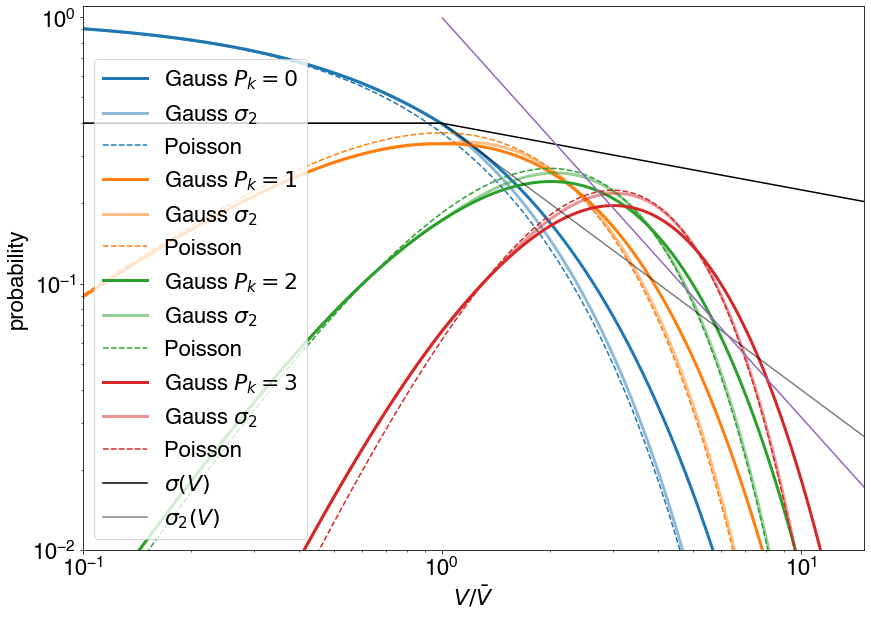

In [42]:

import warnings
#suppress warnings
warnings.filterwarnings('ignore')


sig = 4e-1*np.maximum(nV,1)**(-.25) # 
sig2 = 4e-1*np.maximum(nV,1)**(-1.) # 

fig = plt.figure(figsize=((14,10)))
ax = plt.gca()
for k in (0,1,2,3):
    color = next(ax._get_lines.prop_cycler)['color']
    plt.loglog(nV, np.abs(PGaussian(k,nV,sig)), lw=3, label="Gauss $P_{k}="+str(k)+"$",c=color)
    plt.loglog(nV, np.abs(PGaussian(k,nV,sig2)), lw=3,alpha=.5,c=color, label="Gauss $\sigma_2$")
    plt.loglog(nV, PPoisson(k,nV),'--',label="Poisson ",c=color)
plt.plot(nV,sig,color="black",label=r"$\sigma(V)$")
plt.plot(nV,sig2,color="black",alpha=.5,label=r"$\sigma_2(V)$")
plt.plot(nV[nV>1],nV[nV>1]**(-3/2))
plt.ylim(1e-2,1.1)
plt.xlim(1e-1,1.5e1)
plt.xlabel(r"$V/\bar{V}$")
plt.ylabel("probability")
plt.legend();

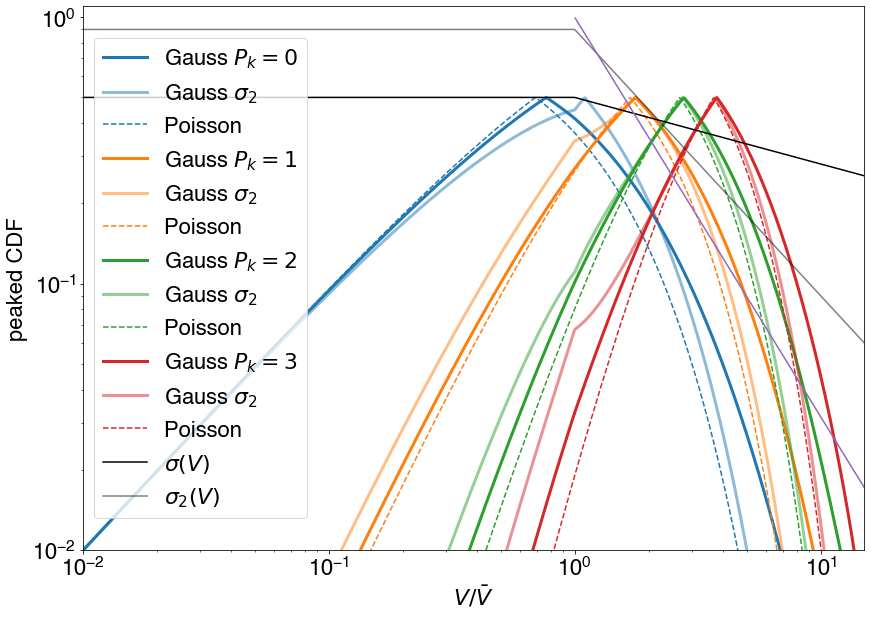

In [53]:

def peaked(v):
    return np.minimum(v, 1 - v)

import warnings
#suppress warnings
warnings.filterwarnings('ignore')


sig = 5e-1*np.maximum(nV,1)**(-.25) # 
sig2 = 9e-1*np.maximum(nV,1)**(-1.) # 

fig = plt.figure(figsize=((14,10)))
ax = plt.gca()
for k in (0,1,2,3):
    color = next(ax._get_lines.prop_cycler)['color']
    plt.loglog(nV, peaked(CDFGaussian(k,nV,sig)), lw=3, label="Gauss $P_{k}="+str(k)+"$",c=color)
    plt.plot(nV, peaked(CDFGaussian(k,nV,sig2)), lw=3,alpha=.5,c=color, label="Gauss $\sigma_2$")
    plt.plot(nV, peaked(CDFGaussian(k,nV,0)),'--',label="Poisson ",c=color)
plt.plot(nV,sig,color="black",label=r"$\sigma(V)$")
plt.plot(nV,sig2,color="black",alpha=.5,label=r"$\sigma_2(V)$")
plt.plot(nV[nV>1],nV[nV>1]**(-3/2))
#plt.plot(nV,peaked(np.exp(-nV+0.5*nV**2*sig**2)),lw=5,label="try")
plt.ylim(1e-2,1.1)
plt.xlim(1e-2,1.5e1)
plt.xlabel(r"$V/\bar{V}$")
plt.ylabel("peaked CDF")
plt.legend();



In [153]:
import pyccl as ccl
cccos = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05,
                            h=0.7, n_s=0.95, sigma8=0.8,
                            transfer_function='boltzmann_class')

z = 0
a = 1/(1+z) # scale factor

kc = 10**np.arange(-4.5,4.5,0.005)
Rcc = 2*np.pi/kc 

Pk_ccl = ccl.linear_matter_power(cccos, kc, a) 
P2dccl = ccl.get_class_pk_lin(cccos)
Pk_ccl_class = P2dccl.eval(kc,a,cccos)
sigma_tophat_cc = ccl.sigmaR(cccos, Rcc/cccos["h"], a)
sigma_tophat_class = ccl.sigmaR(cccos, Rcc/cccos["h"], a,p_of_k_a=P2dccl)




## Cosmological application at around the BAO scale

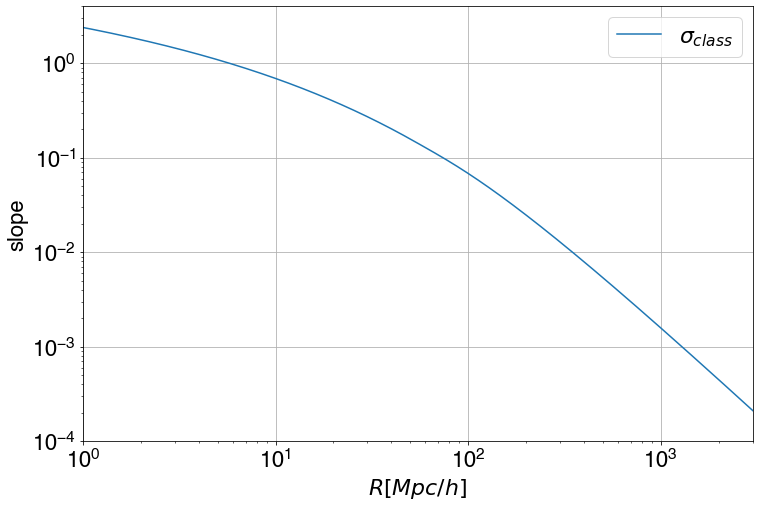

In [154]:
plt.loglog(Rcc,sigma_tophat_class, label=r"$\sigma_{class}$")
plt.xlim(1, 3e3);
plt.ylim(1e-4,4e0)
plt.grid()
plt.ylabel("slope")
plt.xlabel(r"$R [Mpc/h]$");
plt.legend();

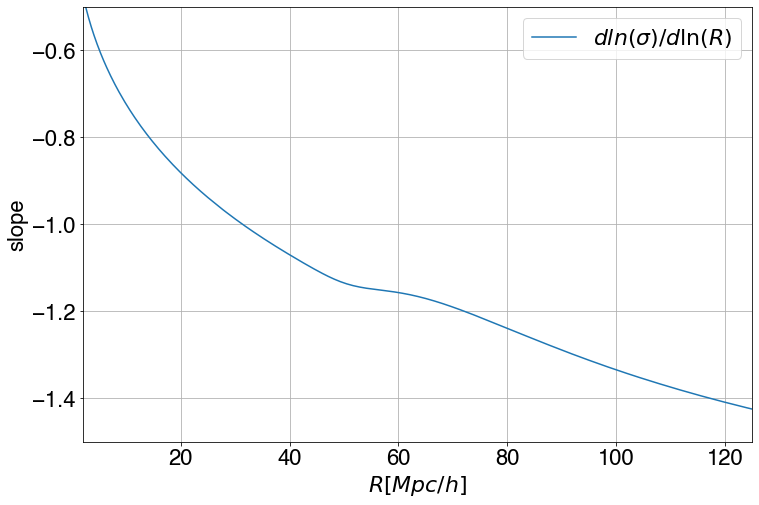

In [155]:
dlogsigma_tophat_class_dlogr = np.gradient(np.log(sigma_tophat_class),np.log(Rcc))

plt.plot(Rcc,dlogsigma_tophat_class_dlogr, label=r"$d ln(\sigma)/d \ln(R)$")
plt.legend();
plt.xlim(2, 125);
plt.ylim(-1.5,-.5)
plt.grid()
plt.ylabel("slope")
plt.xlabel(r"$R [Mpc/h]$");


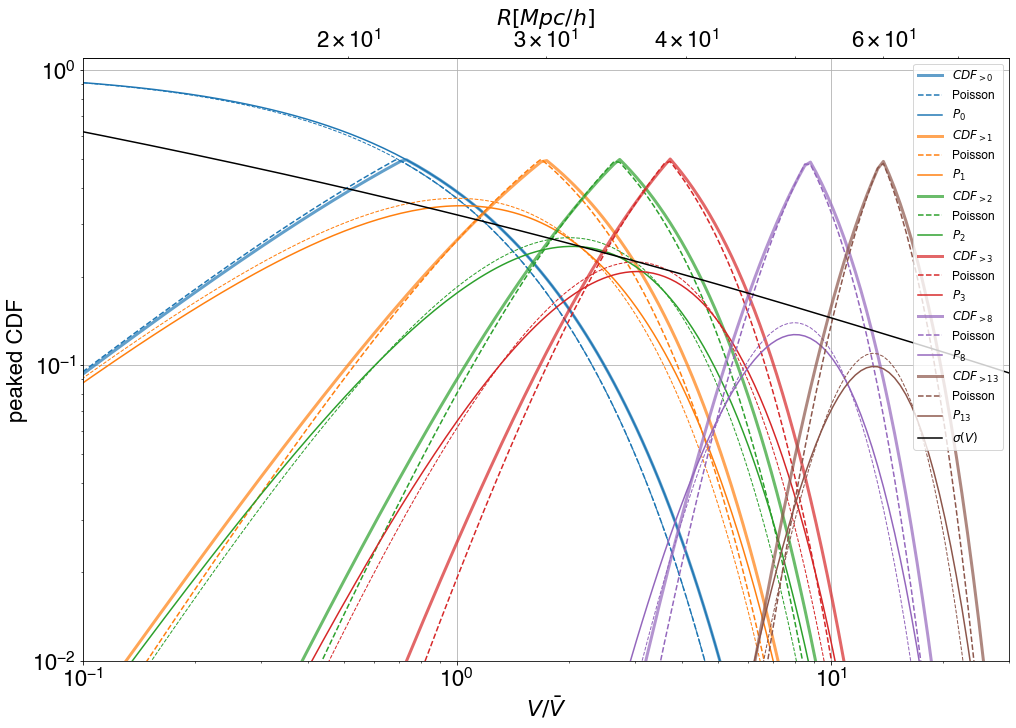

In [175]:
R_target = 25 # Mpc/h mean separation of observed sample
def sphvol(R):
    return R**3 * 4*np.pi/3
def RfromV(V):
    return (V/(4*np.pi/3))**.333334
def RfromVoVbar(VoVbar):
    return RfromV(VoVbar*Vbar)

Vbar = sphvol(R_target) # mean volume per tracer object
nV = sphvol(Rcc)/Vbar
sig = sigma_tophat_class

fig, ax1 = plt.subplots(figsize=((14,10)),constrained_layout=True)

for k in (0,1,2,3,8, 13):
    color = next(ax1._get_lines.prop_cycler)['color']
    ax1.loglog(nV, peaked(CDFGaussian(k,nV,sig)), lw=3, alpha=0.7,label="$CDF_{>"+str(k)+"}$",c=color)
    ax1.plot(nV, peaked(CDFGaussian(k,nV,0)),'--',label="Poisson ",c=color)
    ax1.loglog(nV, np.abs(PGaussian(k,nV,sig)), lw=1.5, label="$P_{"+str(k)+"}$",c=color)
    ax1.loglog(nV, np.abs(PGaussian(k,nV,0)), '--', lw=1, c=color)
ax1.plot(nV,sig,color="black",label=r"$\sigma(V)$")
#ax1.plot(nV[nV>1],nV[nV>1]**(-3/2))
#plt.plot(nV,peaked(np.exp(-nV+0.5*nV**2*sig**2)),lw=5,label="try")
plt.ylim(1e-2,1.1)
ax1.set_xlim(1e-1,3e1)
#plt.yscale("linear")
ax1.grid()
secax = ax1.secondary_xaxis('top', functions=(RfromVoVbar, sphvol))
secax.set_xlabel(r"$R [Mpc/h]$")
ax1.set_xlabel(r"$V/\bar{V}$")
plt.ylabel("peaked CDF")
ax1.legend()
ax1.legend(prop=dict(size=12));